# Histograms of C. elegans similarities

In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import umap
import matplotlib.pyplot as plt
from umapns.my_utils import filter_graph, get_UMAP_push_weight_keops
from umapns.my_plot import hists_from_graph_embd
import os
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
fig_path = "../figures"
data_path = "../data/packer_c-elegans"
seed = 0

In [9]:
alpha=0.5
min_dist = 0.1
spread = 1.0
a, b= umap.umap_.find_ab_params(spread=spread, min_dist=min_dist)


In [10]:
# load precomputed UMAP instance
with open(os.path.join(data_path, f"umapperns_after_seed_{seed}.pkl"), "rb") as file:
    umapperns = pickle.load(file)
    embd = umapperns.embedding_

# filter graph as done during the UMAP optimization
c_elegans_fil_graph = filter_graph(umapperns.graph_, umapperns.n_epochs).tocoo()


Thu Apr 22 09:22:04 2021 Building and compiling search function


In [11]:
# compute the historgrams
hist_high_c_elegans, \
hist_high_pos_c_elegans, \
hist_target_c_elegans, \
hist_target_pos_c_elegans, \
hist_low_c_elegans, \
hist_low_pos_c_elegans, \
bins_c_elegans = hists_from_graph_embd(graph=c_elegans_fil_graph,
                                       embedding=embd,
                                       a=a,
                                       b=b)

Historgram counts should match product of input tensor shapes, but are 7400128576 and 7400128446.


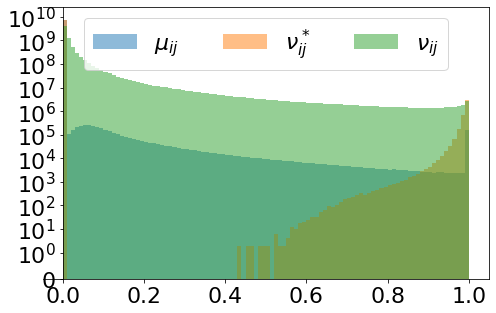

In [12]:
# plot histogram of all edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_high_c_elegans, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_target_c_elegans, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_low_c_elegans, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center",  ncol=3)
plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"c_elegans_hist_sims_all_log_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

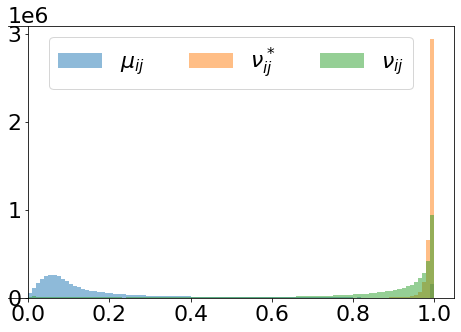

In [13]:
# plot histogram of positive high-dimensional edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_high_pos_c_elegans, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_target_pos_c_elegans, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_low_pos_c_elegans, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center", ncol=3)
#plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"c_elegans_hist_sims_pos_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [14]:
# load UMAP instance with inverted high-dimensional similarities
seed=0
with open(os.path.join(data_path, f"umapperns_inv_seed_{seed}.pkl"), "rb") as file:
    umapperns_inv = pickle.load(file)
    embd_inv = umapperns_inv.embedding_

c_elegans_inv_fil_graph = filter_graph(umapperns_inv.graph_, umapperns.n_epochs).tocoo()



In [15]:
# compute all histograms
hist_high_c_elegans_inv, \
hist_high_pos_c_elegans_inv, \
hist_target_c_elegans_inv, \
hist_target_pos_c_elegans_inv, \
hist_low_c_elegans_inv, \
hist_low_pos_c_elegans_inv, \
bins_c_elegans_inv= hists_from_graph_embd(graph=c_elegans_inv_fil_graph,
                                          embedding=embd_inv,
                                          a=a,
                                          b=b)



Historgram counts should match product of input tensor shapes, but are 7400128576 and 7400128402.


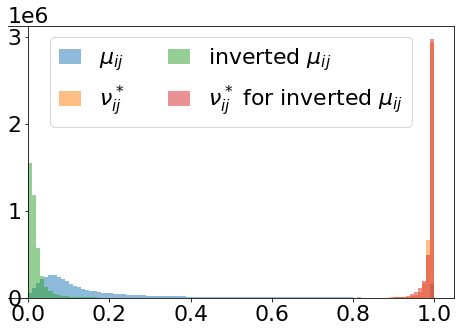

In [16]:
# compare histograms of for positive high-dimensional and target similarities for normal and inverted high-dimensional similarities
alpha=0.5
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_high_pos_c_elegans,
         alpha=alpha,
         label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_target_pos_c_elegans,
         alpha=alpha,
         label=r"$\nu_{ij}^*$")

plt.hist(bins_c_elegans_inv[:-1],
         bins_c_elegans_inv,
         weights=hist_high_pos_c_elegans_inv,
         alpha=alpha,
         label=r"inverted $\mu_{ij}$")
plt.hist(bins_c_elegans_inv[:-1],
         bins_c_elegans_inv,
         weights=hist_target_pos_c_elegans_inv,
         alpha=alpha,
         label=r"$\nu_{ij}^*$ for inverted $\mu_{ij}$")

plt.legend(loc="upper center",  ncol=2, handlelength=1.0)
#plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"c_elegans_compare_no_inv_inv_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [17]:
# maximal true repulsive weight
c_elegans_push_weights_keops, _ = get_UMAP_push_weight_keops(high_sim=c_elegans_fil_graph,
                                                             negative_sample_rate=umapperns.negative_sample_rate)
print(c_elegans_push_weights_keops.max(1).max())

# average intended repulsive weight

n_pairs = np.prod(c_elegans_fil_graph.shape)
avg_high_sim_push_weight = 1/n_pairs * ((1-c_elegans_fil_graph.data).sum()  # rep weights below one
                           + n_pairs - c_elegans_fil_graph.nnz) # rep weights equal one
print(avg_high_sim_push_weight)




tensor(0.0043, device='cuda:0')
0.9998971752663235
